# Week 1 Lecture 1

# Topics for Today
1.  Outline of course
2.  Grading
3.  Background on deep learning
4.  Neural Net Example

What you will learn
1.  What are neural nets
2.  What is deep learning
3.  Why so much of this course is on optimization
4.  How to train a simple neural net


# Outline and Administrative 

# Background on Neural Nets
Neural nets derive their inspiration from animal nervous systems.  The wikipedia page on neurons gives a good illustration of the wiring of an animal nervous system. 
https://en.wikipedia.org/wiki/Neuron

Q's
1.  What does it mean to say a neuron fires?
2.  What causes a neuron to fire?
3.  What are the inputs to a neuron and how many of them are there (fan-in)?
4.  What are the outputs of a neuron and how many of them are there (fan-out)?

Scientists began to understand the operation of individual neurons and the interconnection of neurons into networks for animal locomotion and cognition.  Mccolloch and Pitts (MCP) developed an abstract version of a neuron and proposed analyzing networks of these abstract neurons as a way to understand and simulate the operation of their biological equivalents. Part of the hope was that networks of these abstract neurons would give insight into the operation of animal brains and perhaps offer some of the same functionality (recall Marvin the computer in "Hitchhiker's Guide to the Galaxy" - "I'm so depressed").  The wiki page on artificial neural networks gives a good summary of the abstract neurons stemming from the MCP neuron.  
https://en.wikipedia.org/wiki/Artificial_neuron

Q's
1.  What elements of a real neuron are captured by the MCP neuron?
2.  What elements are not?  
3.  How would you connect MCP neurons into a network?  
4.  Suppose you want to use a network of MCP neurons for machine learning (a classifier).  

The most general arrangement of neuron connections is the "fully connected" network wherein every neuron is an input to every other neuron.  Fully-connected neural nets are not (yet) practical in applications.  The neural networks used in applications have more limited structures.  The wiki page on artificial neural networks shows the structure for one of the most common architectures - the feed-forward network.  

https://en.wikipedia.org/wiki/Artificial_neural_network

Q's
1.  In an image classification problem what would the ANN input and output be?  
2.  What constitutes "training" an ANN?


##Training a Simple ANN Classifier

The next several lectures are going to discuss various problems and algorithms for numerical optimization - using the computer to find the maximum or minimum of a function.  To motivate that work this section will work through the process of training a simple neural net classifier.  As always, the first step is to have a look at the data.  

For this example the data are synthetic - that is the data are synthesized using the computer.  The code for producing the data is shown in the code window below.  


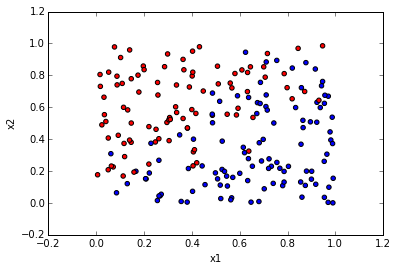

In [5]:
__author__ = 'mike.bowles'
import random
import matplotlib.pyplot as plot
%matplotlib inline
#synthesize a 2-d classification data set

X1 = []
X2 = []
Y = []
noiseSd = 0.2
numRows = 200
for i in range(numRows):
    #generate attributes x1 and x2 by drawing from uniform (0,1)
    x1 = random.random()
    x2 = random.random()
    y = 0.0
    if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
        y = 1.0
    X1.append(x1); X2.append(x2); Y.append(y);

colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y]
plot.scatter(X1, X2, c=colors)
plot.xlabel('x1')
plot.ylabel('x2')
plot.show()


The problem has two attributes (x1 and x2 in the code) and one outcome (y in the code).  The color-coded plot of the data shows each of the 200 points generated by taking draws from uniform random variates.  Roughly, anything above the 45 degree line x2 = x1 is marked red and anything below is marked blue.  Due to the addition of some noise there are some red examples below the 45 degree line and some blue examples above the line.  To build a classifier for this data set you're going to use the simple neural net shown in the figure below.  

<img src="w1L1SimpleNN.png">

The neural net above has two layers - an input layer and an output layer.  The input layer has two neurons one for each of the attributes in the problem.  Each of the attributes gets multiplied by its own weight (w1 and w2 in the figure).  Then the weighted sum of the attributes is passed through a non-linearity.  Non-linearities play an important role in ANN.  Without non-linearities an ANN becomes a linear function of the input and loses it's ability to model very complicated behaviors.  Non-linearities play an important role in ease (or difficulty) of training and in the overall network performance.  A non-linear function is any function that's not linear.  A linear function is real-valued function f() over a vector space (usually $\mathbb{R^n})$ that satisfies the following two conditions.  For any two vectors $v, w\in\mathbb{R^n}$ and any scalar $\alpha \in \mathbb{R}$, $f(\alpha v) = \alpha f(v)$ and $f(v + w) = f(v) + f(w)$

This example uses a sigmoid non-linearity.  The sigmoid function is also called the logistic function and you may recall seeing it when you studied logistic regression.  The sigmoid function (called S() here) is given by:  

$S(x) = \frac{1}{(1 + e^{-x})}$

The code block below generates a plot of the sigmoid function.  

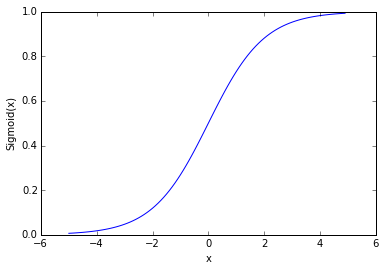

In [10]:
import math
import matplotlib.pyplot as plot
%matplotlib inline

X = [x/10.0 for x in range(-50, 50, 1)]
Y = [1.0/(1.0 + math.exp(-x)) for x in X]
plot.plot(X, Y)
plot.xlabel('x')
plot.ylabel('Sigmoid(x)')
plot.show()

You can see from the plot that the sigmoid function is a soft threshold version of the hard threshold in the MCP neuron model discussed earlier in this lecture.  One reason for using sigmoid instead of the sharp step of the MCP neuron is that the sigmoid function is differentiable.  You will understand why that's desirable once you see how to train this neural net.  

As you learned in earlier general discussion of neural nets, training entails determining the weights in the network.  One way to do that is to define and error in the network and then minimize the magnitude of error.  In this case the neural net is going to give us values between 0.0 and 1.0.  The numeric labels in the problem are either 0.0 or 1.0, so it's natural to define the error as 

$Error = y - S(w_1x_1 + w_2x_2)$

This will produce an error measure for each of the points in the data set.  The next step is to accumulate these over the whole input data set.  These errors have a sign.  It doesn't make sense to accumulate the raw errors.  A usual solution is to square the errors and sum them.  It might seem more sensible to you to take absolute values instead of squaring.  The principal reason for taking the squares is that the square function is differentiable, whereas the absolute value function is not differentiable at zero, where it has a corner.  You'll see in a few minutes why differentiability is important.  

To optimize this simple neural net define a function $J(w_1, w_2)$ as follows: 

$J(w_1, w_2) = \frac{1}{2M}\sum_{i=1}^{M} (y(i) - S(w_1(i)x_1(i) + w_2(i)x_2(i)))^2$

In this expression, M is the number of rows in the data set.  The objective is to pick the weights w1 and w2 to minimize the function J.  The hands down favorite approach gradient descent.  The first step is to calculate the gradient of J.  The gradient will be a two-vector whose entries guage how much J will change as $w_1$ and $w_2$ are changed.  The gradient is defined as:

$\nabla J = \begin{bmatrix}
  \frac{d}{dw_1} J(w_1, w_2) \\
  \frac{d}{dw_2} J(w_1, w_2)
 \end{bmatrix}$
 
Since the derivative of a sum is equal to the sum of the derivatives of the components of the sum, all that's required is to compute the derivative of the individual squared-error terms that make up J.  Here's how that calculation goes for the derivative with respect to $w_1$.  Once you see that you'll also see how to modify it to get the derivate with respect to $w_2$.  You'll see that calculating the gradient requires taking the derivative of the Sigmoid function.  With a little manipulation you can derive that 

$\frac{d}{ds} S(s) = S(s)  S(-s)$

Then the gradient of the summands in J can be found. 

$\frac{d}{dw_1}\frac{1}{2M}(y(i) - S(w_1(i)x_1(i) + w_2(i)x_2(i)))^2 =$

$  = \frac{1}{M}(y(i) - S(w1_(i)x_1(i) + w_2(i)x_2(i)))  \frac{d}{dw_1} (- S(w_1(i)x_1(i) + w_2(i)x_2(i)))$

Define $w \bullet x = w_1(i)x_1(i) + w_2(i)x_2(i)$, and define $e = (y(i) - S(w \bullet x))$ then

$  = \frac{1}{M}\, e \, \frac{d}{dw_1} (- S(w \bullet x))$

$  = - \frac{1}{M}\, e\,  S(w \bullet x)\,  S(-w \bullet x) x_1$
 
The code below uses this gradient calculation to train the simple neural net.  The training algorithm starts with random guesses for the two weights $w_1$ and $w_2$.  Then the program calcuates the gradient of the mean squared error, as determined in the derivation you just saw.  The program uses the gradient to adjust the weights, calculates a new gradient after the adjustment and the adjusts the weights again.  The process proceeds iteratively like this until the improvements in the mean square error show diminishing returns from continuing.  The plots generated by the code show the evolution of the two weights $w_1$ and $w_2$ and the corresponding decrease in the mean squared error.  
 

In [ ]:
__author__ = 'mike.bowles'
import random
import matplotlib.pyplot as plot
import math
%matplotlib inline
#synthesize a 2-d classification data set

X1 = []
X2 = []
Y = []
noiseSd = 0.2
numRows = 200
for i in range(numRows):
    #generate attributes x1 and x2 by drawing from uniform (0,1)
    x1 = random.random()
    x2 = random.random()
    y = 0.0
    if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
        y = 1.0
    X1.append(x1); X2.append(x2); Y.append(y);

# colorMap = {0.0: "blue", 1.0: "red"}
# colors = [colorMap[c] for c in Y]
# plot.scatter(X1, X2, c=colors)
# plot.show()

def S(x):  #sigmoid function
    return 1.0 / (1.0 + math.exp(-x))

def numGrad(yN, x1N, x2N, w1N, w2N): #numerical gradient calculation
    delta = 1e-8
    argN = w1N * x1N + w2N * x2N
    argW1 = (w1N + delta) * x1N + w2N * x2N
    argW2 = w1N * x1N + (w2N + delta) * x2N

    grad1 = 0.5 * ((yN - S(argW1))**2 - (yN - S(argN))**2) / delta
    grad2 = 0.5 * ((yN - S(argW2))**2 - (yN - S(argN))**2) / delta
    return [grad1, grad2]

#Gradient Descent
nSteps = 50
stepSize = 20.0
w1 = random.random()
w2 = random.random()

#lists for weight history
W1 = []
W1.append(w1)
W2 = []
W2.append(w2)

#list for PI history
J = []
M = len(X1)

for iStep in range(nSteps):
    #calculate gradient and PI
    gradient1 = 0.0
    gradient2 = 0.0
    jTemp = 0.0

    #numerical version of gradient as a check on math
    gradCheck1 = 0.0
    gradCheck2 = 0.0
    for iData in range(len(X1)):
        arg = w1 * X1[iData] + w2 * X2[iData]
        error = Y[iData] - S(arg)
        jTemp += 0.5 * error**2 / M
        gradient1 += -error * S(arg) * S(-arg) * X1[iData] / M
        gradient2 += -error * S(arg) * S(-arg) * X2[iData] / M

        #calculate numerical version
        numerical = numGrad(Y[iData], X1[iData], X2[iData], w1, w2)
        gradCheck1 += numerical[0] / M
        gradCheck2 += numerical[1] / M

    #Check gradient calculation
    #print(gradient1/gradCheck1, gradient2/gradCheck2)

    #take a gradient step to improve performance
    #step in minus gradient direction since minimizing

    w1 = w1 - stepSize * gradient1
    w2 = w2 - stepSize * gradient2

    W1.append(w1)
    W2.append(w2)
    J.append(jTemp)


plot.plot(range(len(W1)), W1)
plot.plot(range(len(W2)), W2)
plot.xlabel('Number of Gradient Descent Steps')
plot.ylabel('Network Weights')
plot.show()

j2 = [2 * x for x in J]
plot.plot(range(len(J)), j2)
plot.xlabel('Number of Gradient Descent Steps')
plot.ylabel('Mean Squared Error')
plot.show()


Q's
1.  Reduce the parameter stepSize by a factor of 10 and rerun.  What qualitative difference does that make to the plots?
2.  Increase the parameter stepSize by a factor of 10.  Repeat that until you see a qualitative difference in the plots.  What happens at large values of step size? 


#What you have learned
1.  How neural nets arose as abstractions of networks of neurons in man and in animals.
2.  How to use gradient descent to train a simple neural net
3.  The relationship between training neural nets and numerical optimization (which you'll now study in more detail)

#Home Work Exercises
Here are some problems that will help you cement your understanding of neural nets.  

1.  Test the effect of data set size on the network training by increasing the size of the synthetic data from 200 to 500.  Retrain.  Look at the differences in the number of iterations required for training, the values of the weights and training time.  Which of these got better and which got worse?  Explain what effect data set size had on these and why.

2.  Suppose that you've got three variables $x_1$, $x_2$ and $x_3$ available for building your classifier.  Suppose also that you've chosen sigmoid activation function for your classifier output and mean squared error.  Then you'll have three weights $w_1$, $w_2$ and $w_3$.  The gradient of a single summand will be a column vector with three elements.  Give the expression for the three components of the gradient of a single summand. 

3.  The simple neural net used in this lecture did not include a bias term.  That worked okay because the data were constructed work with a decision boundary that went through the origin.  In general that won't work.  Suppose that the input to the sigmoid function has the form $w_1 * x_1 + w_2 * x_2 + b$ and derive the gradient expression for training all three of the free parameters $w_1$, $w_2$ and b.  

4.  The trained weights $w_1$ and $w_2$ are roughly -4.2 and +4.2 with the parameters in the original code for this lecture.  That makes the line $-4.2 * x_1 + 4.2 * x_2 = 0.0$ a decision boundary between class 0 and class 1.  If the weights had been -2.0 and +2.0 it would define the same decision boundary.  The difference between these is how fast the sigmoid approaches 1.0 or 0.0 above and below the decision boundary.  What happens to these weights if you change the synthetic data by changing the parameter noiseSd from 0.2 (in the original code) to 0.5?  Explain why the weights got bigger or smaller.  
